In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy           # Necessário para copiar os dados dentro de funções e evitar alterações inplace dos dados
                                    # Isso para que as funções recebam um dado e gerem um dado novo, mantendo o original inalterado.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [5]:
DATA_PATH = '../dados/dados_treino.csv'

raw_data = pd.read_csv(DATA_PATH)

In [6]:
raw_data.info()    # Informaçãões gerais do dataset. Permite ver se há valores NULL.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bateria                         4975 non-null   object 
 1   Tem_Instr_Violao_Viola          4975 non-null   bool   
 2   Tem_Instr_Guitarra              4975 non-null   bool   
 3   Tem_Instr_Cavaco                4975 non-null   bool   
 4   Tem_Instr_Sintetizador_Teclado  4975 non-null   bool   
 5   Tem_Instr_Piano                 4975 non-null   bool   
 6   Tem_Instr_Metais                4975 non-null   bool   
 7   Tem_Instr_Madeiras              4975 non-null   bool   
 8   Tem_Instr_Cordas                4975 non-null   bool   
 9   BPM                             4975 non-null   float64
 10  VolMedio                        4975 non-null   float64
 11  PctCantada                      4975 non-null   float64
 12  PctRap                          49

In [7]:
raw_data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4975 entries, 0 to 4974
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bateria                         4975 non-null   object 
 1   Tem_Instr_Violao_Viola          4975 non-null   bool   
 2   Tem_Instr_Guitarra              4975 non-null   bool   
 3   Tem_Instr_Cavaco                4975 non-null   bool   
 4   Tem_Instr_Sintetizador_Teclado  4975 non-null   bool   
 5   Tem_Instr_Piano                 4975 non-null   bool   
 6   Tem_Instr_Metais                4975 non-null   bool   
 7   Tem_Instr_Madeiras              4975 non-null   bool   
 8   Tem_Instr_Cordas                4975 non-null   bool   
 9   BPM                             4975 non-null   float64
 10  VolMedio                        4975 non-null   float64
 11  PctCantada                      4975 non-null   float64
 12  PctRap                          49

In [8]:
raw_data.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,modo,gostou,data_curtida,n_reproducao,id_cliente
0,Acústica,False,True,False,False,True,False,False,False,128.652946,-8.743969,38.671394,0.0,680510,1977,NaN,False,2021-07-29,5,#ID4940
1,Acústica,True,False,True,False,False,False,False,False,107.679121,-12.128194,75.739791,0.0,195746,2014,f,False,2021-07-29,5,#ID4940
2,Nenhuma,False,True,False,False,True,True,False,False,117.885751,-10.880246,35.978128,0.0,413618,1968,D#,False,2021-07-29,4,#ID4940
3,Acústica,False,True,False,False,True,True,True,False,119.309408,-12.489925,45.763376,0.0,749101,1963,D#,True,2021-07-29,3,#ID4940
4,Eletrônica,False,False,False,True,True,False,False,False,153.488568,-6.412484,58.979747,0.0,168978,2020,c,False,2021-07-29,2,#ID4940


In [9]:
# Dataset de referencia:
import sklearn.datasets
from sklearn import preprocessing
X,y = sklearn.datasets.load_boston(return_X_y=True)

In [10]:
print(type(X))

<class 'numpy.ndarray'>


## OBS: Essa classe está em construção e deve ser adequada antes de seu uso! No momento está feita praticamente como um aglomerado de funções

In [11]:
class Preprocessor():
    '''
        Saída final esperada: um dicionário com as saídas 
    '''
        # colocar as variáveis de interesse da classe:
        # especialmente o dataframe base, e dados de trabalho
    def __init__(self):
        # colocar as variáveis de interesse da classe:
        # especialmente o dataframe de entrada
        pass

    def _bool_to_int(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        '''
        
        Converte as colunas do tipo bool para o tipo int (0 e 1).
        
        '''
        columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
                'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
                'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'gostou']                      # Adicionar as colunas da bateria aqui depois
        new_df = deepcopy(dataframe)
        
        for col in columns:
            new_df[col] = new_df[col].astype(int)
            
        return new_df
    
    def _bateria_to_bool(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        '''
        
        Transforma a coluna bateria para ser representada por binários
        Essa função pode ser modificada para processar a coluna bateria de formas distintas.
        
        '''
        new_df = deepcopy(dataframe)
        new_df['bateria_eletronica'] = (new_df['bateria'] == 'Eletrônica').astype(int)
        new_df['bateria_acustica']   = (new_df['bateria'] == 'Acústica').astype(int)
        new_df['bateria_nenhuma']     = (new_df['bateria'] == 'Nenhuma').astype(int)
        new_df = new_df.drop(columns = ['bateria'])
        return new_df

    def _get_user_data(self, USER: str, raw_data: pd.DataFrame) -> pd.DataFrame:
        user_data = raw_data[raw_data['id_cliente'] == USER]
        user_data = bool_to_int(user_data)
        user_data = bateria_to_bool(user_data)
        user_data['modo'] = user_data['modo'].fillna("K")
        
        return user_data
    
    def scale_to_bool(self,scale):
        string = {
            'K'  : 1,
            'c'  : 0,
            'c#' : 0, 
            'C'  : 1,
            'C#' : 1,
            'd'  : 0,
            'd#' : 0,
            'D'  : 1,
            'D#' : 1,
            'e'  : 0,
            'E'  : 1,
            'f'  : 0,
            'f#' : 0,
            'F'  : 1,
            'F#' : 1,
            'g'  : 0,
            'g#' : 0,
            'G'  : 1,
            'G#' : 1,
            'a'  : 0,
            'a#' : 0,
            'A'  : 1,
            'A#' : 1,
            'b'  : 0,
            'B'  : 1
        }[scale]
        return string


    def scale_to_one_hot(self, raw_data: pd.DataFrame):
    # One hot encoding the mode feature data
        new_df = deepcopy(raw_data)
        mode_df = pd.get_dummies(new_df["modo"])
        new_df = new_df.drop(columns = ['modo'])
        # new_df.merge(mode_df,how='left', on='duracao')
        #  Place the DataFrames side by side
        new_df = pd.concat([new_df,mode_df], axis=1)
        return new_df

def preprocess(self):    
    '''
        Aplica todas as estratégias de preprocessamento para adequar à estrutura entendida pelo sklearn
    '''
    
    raw_data = pd.read_csv(DATA_PATH)
    raw_data['PctCantada'] = raw_data['PctCantada'] / 100
    raw_data['PctRap'] = raw_data['PctRap'] / 100
    raw_data['duracao'] = raw_data['duracao'] / (60*1000)
    raw_data['VolMedio'] = raw_data['VolMedio'].abs()
    raw_data['duracao']  = raw_data['duracao'].abs()
    raw_data['modo'] = raw_data['modo'].fillna('K')
    raw_data['escala_maior'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
    # raw_data['modo'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
    raw_data = bool_to_int(raw_data)
    raw_data = bateria_to_bool(raw_data)

    raw_data = scale_to_one_hot(raw_data) # Não gostei muito da solução, mas até faz sentido
    print(raw_data)

    def filter_user(self, user):
        user_data = raw_data[raw_data['id_cliente'] == USER]
        # definir melhor a interface

    def train_test_split(self): #adicionar parametros de entrada
        input_data = user_data.drop(columns = ["data_curtida", "id_cliente"])[user_data['id_cliente'] == USER]
        # X = (.to_numpy()
        X = input_data.drop(columns = ["gostou"]).to_numpy()
        Y = input_data["gostou"].to_numpy()
        Y = Y.ravel()
        print(Y.shape)
        print(X.shape)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 70% training and 30% testv
        return X_train, X_test, y_train, y_test 
    
    def SMOTE_oversampling(self):
    # colocar uns parametros uteis de entrada
        # Teste do SMOTE
        # sm = SMOTE(random_state=42)
        # X_train_res, Y_train_res = sm.fit_resample(X_train, y_train)

        a = np.arange(0,8)
        b = np.array([11])
        c = np.arange(15,44)
        categorical_index = np.concatenate([a,c])
        categorical_index = np.concatenate([categorical_index,b])
        categorical_index = list(categorical_index)

        # Teste SMOTE-NC
        smote_nc_over = SMOTENC(categorical_features=categorical_index, random_state=0)

        under = RandomUnderSampler(sampling_strategy='majority',random_state=0)

        steps = [('o', smote_nc_over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        X_train_res, Y_train_res = pipeline.fit_resample(X_train, y_train)

        # X_train_res, Y_train_res = smote_nc_over.fit_resample(X_train, y_train)

    def check_balancing(self):
        ## Count elements
        count_plus = 0
        count_minus = 0

        for y_val in Y_train_res:
            
            if y_val == 1:
                count_plus +=1
            else: 
                count_minus +=1
        print("Positive examples:",count_plus)
        print("Negative examples:",count_minus)

# Talvez criar um método que aplique todos os passos pra evitar linhas de código -> Mas acho que será só isso o dataset, não deve haver problemas extras

In [12]:
# enc = preprocessing.OneHotEncoder()
# X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
# enc.fit(X)

# transform = enc.transform([['female', 'from US', 'uses Safari'],
#                ['male', 'from Europe', 'uses Safari']]).toarray()
# print(X)
# print(transform)

In [13]:
columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
           'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
           'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'c' ,'K' ,'c#','C' ,'C#','d' ,'d#','D' ,'D#','e' ,'E' ,'f' ,'f#','F' ,'F#','g' ,'g#','G' ,'G#','a' ,'a#','A' ,'A#','B' ,'b'] 

In [14]:
# métodos já implementados
def bool_to_int(dataframe: pd.DataFrame) -> pd.DataFrame:
    '''
    
    Converte as colunas do tipo bool para o tipo int (0 e 1).
    
    '''
    columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
               'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
               'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'gostou']                      # Adicionar as colunas da bateria aqui depois
    new_df = deepcopy(dataframe)
    
    for col in columns:
        new_df[col] = new_df[col].astype(int)
        
    return new_df

def bateria_to_bool(dataframe: pd.DataFrame) -> pd.DataFrame:
    '''
    
    Transforma a coluna bateria para ser representada por binários
    Essa função pode ser modificada para processar a coluna bateria de formas distintas.
    
    '''
    new_df = deepcopy(dataframe)
    new_df['bateria_eletronica'] = (new_df['bateria'] == 'Eletrônica').astype(int)
    new_df['bateria_acustica']   = (new_df['bateria'] == 'Acústica').astype(int)
    new_df['bateria_nenhuma']     = (new_df['bateria'] == 'Nenhuma').astype(int)
    new_df = new_df.drop(columns = ['bateria'])
    return new_df

def get_user_data(USER: str, raw_data: pd.DataFrame) -> pd.DataFrame:
    user_data = raw_data[raw_data['id_cliente'] == USER]
    user_data = bool_to_int(user_data)
    user_data = bateria_to_bool(user_data)
    user_data['modo'] = user_data['modo'].fillna("K")
    
    return user_data

# métodos da analise exploratoria

In [15]:
def scale_to_bool(scale):
    string = {
        'K'  : 1,
        'c'  : 0,
        'c#' : 0, 
        'C'  : 1,
        'C#' : 1,
        'd'  : 0,
        'd#' : 0,
        'D'  : 1,
        'D#' : 1,
        'e'  : 0,
        'E'  : 1,
        'f'  : 0,
        'f#' : 0,
        'F'  : 1,
        'F#' : 1,
        'g'  : 0,
        'g#' : 0,
        'G'  : 1,
        'G#' : 1,
        'a'  : 0,
        'a#' : 0,
        'A'  : 1,
        'A#' : 1,
        'b'  : 0,
        'B'  : 1
    }[scale]
    return string

In [16]:
# One hot encoding the mode feature data:

def scale_to_one_hot(raw_data: pd.DataFrame):
    new_df = deepcopy(raw_data)
    mode_df = pd.get_dummies(new_df["modo"])
    new_df = new_df.drop(columns = ['modo'])
    # new_df.merge(mode_df,how='left', on='duracao')
    #  Place the DataFrames side by side
    new_df = pd.concat([new_df,mode_df], axis=1)
    return new_df

In [17]:
raw_data = pd.read_csv(DATA_PATH)
raw_data['PctCantada'] = raw_data['PctCantada'] / 100
raw_data['PctRap'] = raw_data['PctRap'] / 100
raw_data['duracao'] = raw_data['duracao'] / (60*1000)
raw_data['VolMedio'] = raw_data['VolMedio'].abs()
raw_data['duracao']  = raw_data['duracao'].abs()
raw_data['modo'] = raw_data['modo'].fillna('K')
raw_data['escala_maior'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
# raw_data['modo'] = raw_data['modo'].apply((lambda mode: scale_to_bool(mode)))
raw_data = bool_to_int(raw_data)
raw_data = bateria_to_bool(raw_data)

raw_data = scale_to_one_hot(raw_data) # Não gostei muito da solução, mas até faz sentido
print(raw_data)

      Tem_Instr_Violao_Viola  Tem_Instr_Guitarra  Tem_Instr_Cavaco  \
0                          0                   1                 0   
1                          1                   0                 1   
2                          0                   1                 0   
3                          0                   1                 0   
4                          0                   0                 0   
...                      ...                 ...               ...   
4970                       1                   0                 0   
4971                       1                   0                 1   
4972                       0                   0                 0   
4973                       1                   1                 0   
4974                       0                   0                 0   

      Tem_Instr_Sintetizador_Teclado  Tem_Instr_Piano  Tem_Instr_Metais  \
0                                  0                1                 0   
1        

In [18]:
USER = '#ID9181'
# USER = '#ID4940'

user_data = raw_data[raw_data['id_cliente'] == USER]

In [19]:
input_data = user_data.drop(columns = ["data_curtida", "id_cliente"])[user_data['id_cliente'] == USER]
# X = (.to_numpy()
X = input_data.drop(columns = ["gostou"]).to_numpy()
Y = input_data["gostou"].to_numpy()
Y = Y.ravel()
print(Y.shape)
print(X.shape)

(2403,)
(2403, 44)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 70% training and 30% testv

In [21]:
# Teste do SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, Y_train_res = sm.fit_resample(X_train, y_train)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

a = np.arange(0,8)
b = np.array([11])
c = np.arange(15,44)
categorical_index = np.concatenate([a,c])
categorical_index = np.concatenate([categorical_index,b])
categorical_index = list(categorical_index)

# Teste SMOTE-NC
smote_nc_over = SMOTENC(categorical_features=categorical_index, random_state=0)

under = RandomUnderSampler(sampling_strategy='majority',random_state=0)

steps = [('o', smote_nc_over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_res, Y_train_res = pipeline.fit_resample(X_train, y_train)

# X_train_res, Y_train_res = smote_nc_over.fit_resample(X_train, y_train)

# Checar se o dataset ficou balanceado
count_plus = 0
count_minus = 0

for y_val in Y_train_res:
    
    if y_val == 1:
         count_plus +=1
    else: 
         count_minus +=1
print("Positive examples:",count_plus)
print("Negative examples:",count_minus)



Positive examples: 1635
Negative examples: 1635


## Testando um classificador para ver se a estrutura do dataset ficou correta

In [22]:
def run_model(dic, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    dic[str(model)[:-2]] = {}

    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    plot_auc(y_test, y_pred, str(model)[:-2])

    dic[str(model)[:-2]]['accuracy'] = accuracy
    dic[str(model)[:-2]]['precision'] = precision
    dic[str(model)[:-2]]['recall'] = recall
    dic[str(model)[:-2]]['f1'] = f1

    return dic

def evaluate_model(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

def plot_auc(y_test, y_pred, model_name):

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')    
    plt.show()
    


In [23]:
from sklearn import metrics

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression

In [24]:
models = [LogisticRegression(), Perceptron(), MLPClassifier(), DecisionTreeClassifier(), SVC()]

C:\Users\Paulo\anaconda3\envs\ML2021-33\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


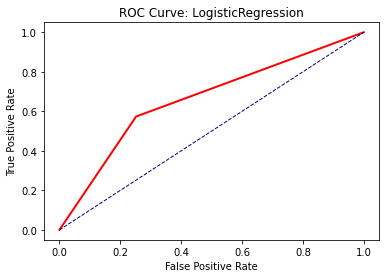

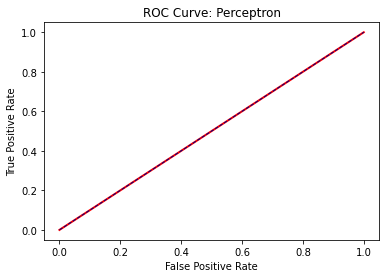

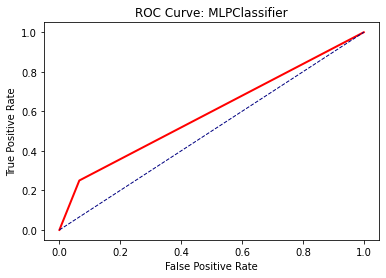

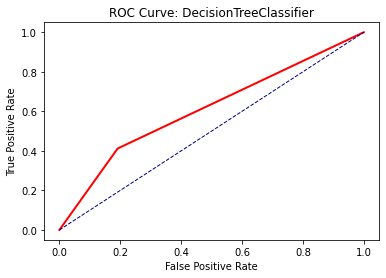

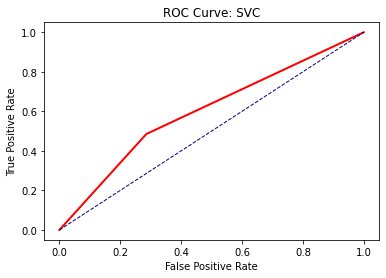

In [25]:
performance = {}

for model in models:
    performance = run_model(performance, model, X_train_res, X_test, Y_train_res, y_test)


In [26]:
table = pd.DataFrame(performance)

In [27]:
table

,LogisticRegression,Perceptron,MLPClassifier,DecisionTreeClassifier,SVC
accuracy,0.723493,0.141372,0.837838,0.752599,0.681913
precision,0.272727,0.141372,0.386364,0.261682,0.218543
recall,0.573529,1.000000,0.250000,0.411765,0.485294
f1,0.369668,0.247723,0.303571,0.320000,0.301370
